In [1]:
from disk_utils_jax import jax_model
from SLD_ojax import ScatteredLightDisk
from SLD_utils import *
import jax.numpy as jnp
import matplotlib.pyplot as plt
from datetime import datetime
from jax import jit
jax.config.update("jax_debug_nans", False)

In [2]:
disk_params = {}
disk_params['inclination'] = 45. #In degrees
disk_params['position_angle'] = 30. #In Degrees
disk_params['alpha_in'] = 7. #The inner power law
disk_params['alpha_out'] = -7. #The outer power law
#gs_ws = jnp.array([0.8,-0.2,0,0.75,0.25,0.]) #Here we have 3 Henyey-Greenstein functions with g parameters of 1, -1, and 0. The weights are 0.75, 0.25, and 0 respectively. 
disk_params['flux_scaling'] = 1e6

#The disk size
disk_params['sma'] = 40. #This is the semi-major axis of the model in astronomical units. 
#To get this in pixels, divide by the distance to the star, to get it in arcseconds. To get it in pixeks, divide by the pixel scale.

In [3]:
# Object Jax code
start = datetime.now()
disk_image_jit_hg = jax_model(DustEllipticalDistribution2PowerLaws, HenyeyGreenstein_SPF, disk_params=disk_params, gs_ws={'g': 0.2})
end = datetime.now()
print(end-start)

/home/mihirkondapalli/anaconda3/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:2683: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  return array(a, dtype=dtype, copy=bool(copy), order=order)  # type: ignore
2024-05-13 15:19:23.981836: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


0:00:02.980008


In [4]:
# Object Jax code
start = datetime.now()
disk_image_jit_hg2 = jax_model(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params=disk_params,
                               gs_ws={'g1': 0.5, 'g2': -0.3, 'weight': 0.7})
end = datetime.now()
print(end-start)

0:00:03.233237


Text(0.5, 1.0, 'Double HG Model (Right)')

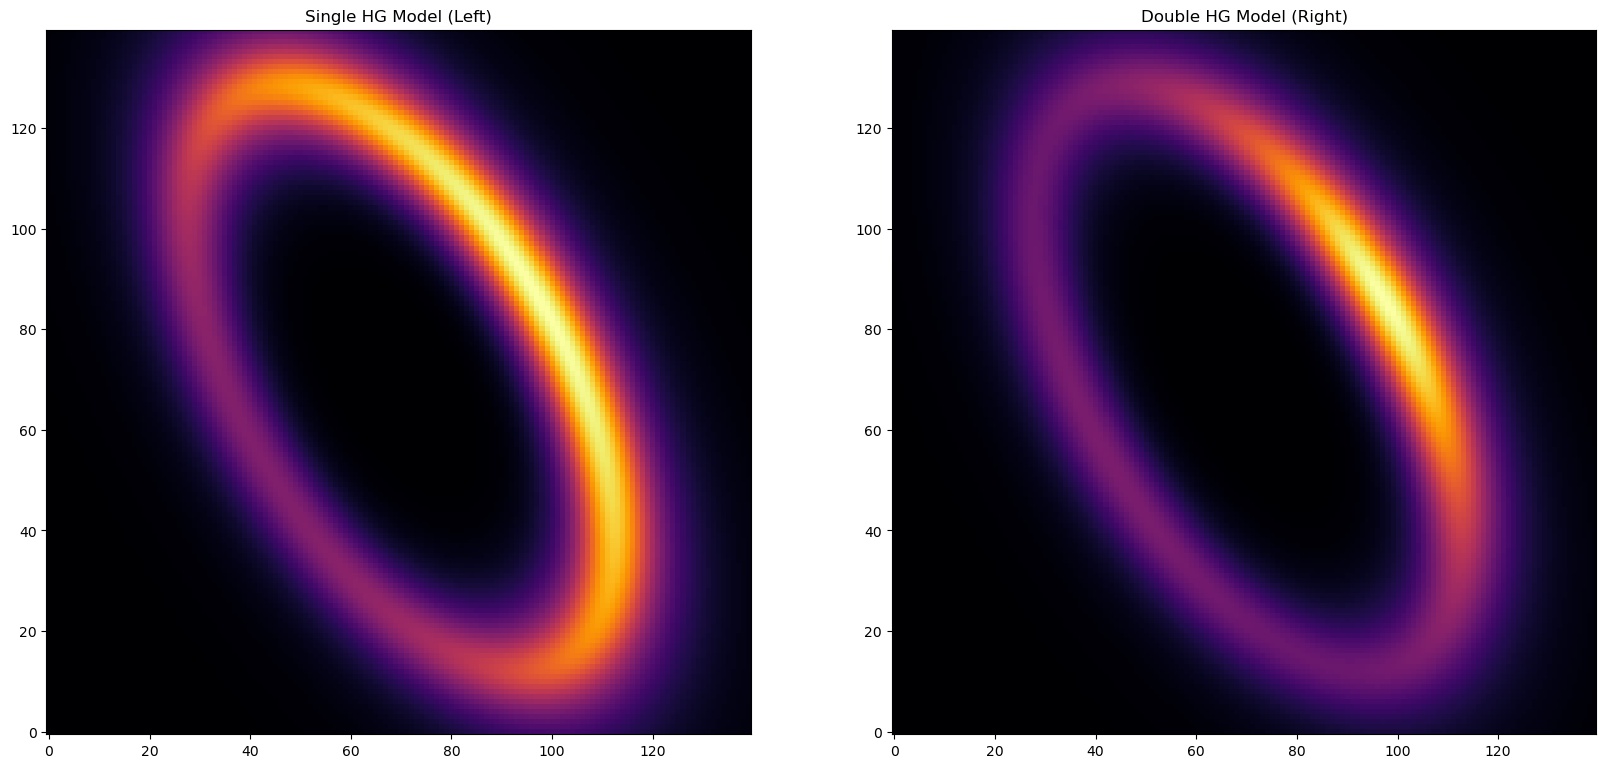

In [5]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

axes[0].imshow(disk_image_jit_hg, origin='lower', cmap='inferno')
axes[0].set_title("Single HG Model (Left)")

axes[1].imshow(disk_image_jit_hg2, origin='lower', cmap='inferno')
axes[1].set_title("Double HG Model (Right)")

In [9]:
def test():
    jax_model(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params=disk_params,
              gs_ws={'g1': 0.5, 'g2': -0.3, 'weight': 0.7})

In [10]:
%timeit test()

137 µs ± 670 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
